In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns



In [13]:
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [12]:
insurance_data = pd.read_csv("insurance.csv")

x= insurance_data.drop(columns=["charges"],axis=1)
y = insurance_data["charges"]

x = pd.get_dummies(x,columns=["region"] , drop_first = True, dtype = int)

#encoding
x["sex"] = x["sex"].map({"female" : 1 , "male" : 0})
x["smoker"] = x["smoker"].map({"yes" : 1 , "no" : 0})

X_train,X_test,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

MSE for alpha={a} 33596924.38828373
MSE for alpha={a} 33597770.05720262
MSE for alpha={a} 33605507.575546026
MSE for alpha={a} 33614211.30874086
MSE for alpha={a} 33639750.85985903
MSE for alpha={a} 33679511.30099594
MSE for alpha={a} 33766604.715291016
MSE for alpha={a} 33855740.161839
MSE for alpha={a} 33947018.40367208
MSE for alpha={a} 34042719.50116739
MSE for alpha={a} 34245283.94567649


<AxesSubplot:>

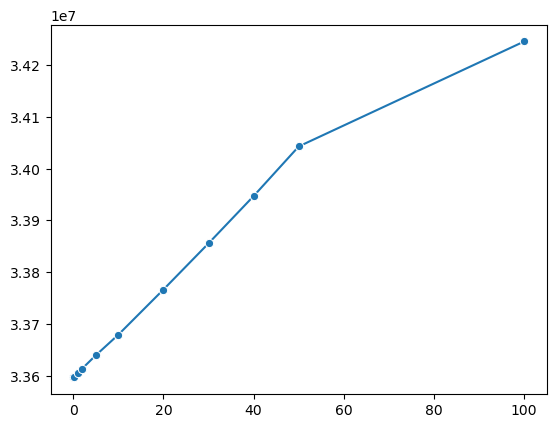

In [26]:
alphas  = [0.001,0.1,1,2,5,10,20,30,40,50,100]
mses=[]
for a in alphas :
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train,y_train)

    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print("MSE for alpha={a}",mse)
    mses.append(mse)

sns.lineplot(x = alphas , y= mses , marker="o")

In [33]:
from sklearn.linear_model import LassoCV
a  = [0.001,0.1,1,2,5,10,20,30,40,50,100]

lasso_cv_model = LassoCV(
    alphas = a,
    cv=5,
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(X_train,y_train)
print("best alpha value:" , lasso_cv_model.alpha_)
y_pred = lasso_cv_model.predict(X_test)
mean_squared_error(y_test,y_pred)
print("mse=",mse)

best alpha value: 100.0
mse= 34245283.94567649
